# About Bx-July

## Number of images

In [ ]:
%pip install matplotlib seaborn pandas

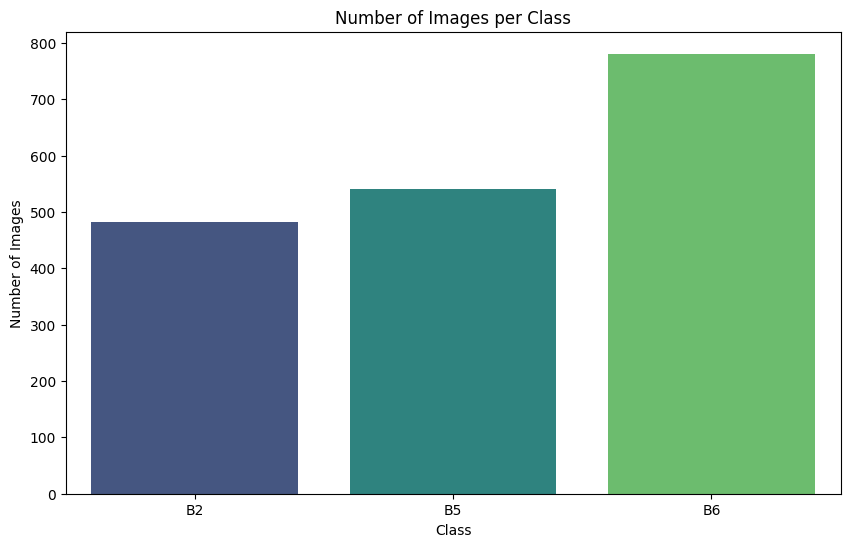

In [4]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

main_folder = '/Data/Projects/AI_Product_ThyroidCancerClassifier/data/Bx-July'

# Tạo một dictionary để lưu số lượng ảnh trong mỗi thư mục con
image_counts = {}

# Duyệt qua các thư mục con và đếm số lượng ảnh
for subfolder in ['B2', 'B5', 'B6']:
    folder_path = os.path.join(main_folder, subfolder)
    if os.path.isdir(folder_path):
        # Đếm số lượng file trong thư mục con
        num_images = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
        image_counts[subfolder] = num_images

# Chuyển đổi dữ liệu thành DataFrame để trực quan hóa dễ hơn
import pandas as pd

df = pd.DataFrame(list(image_counts.items()), columns=['Class', 'Number of Images'])

# Vẽ biểu đồ cột số lượng ảnh
plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='Number of Images', data=df, hue='Class', palette='viridis')
plt.title('Number of Images per Class')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()

## Visualize the data

In [ ]:
%pip install numpy matplotlib seaborn scikit-learn pillow

In [ ]:
from PIL import Image
import numpy as np
import os

def get_image_features(image_path):
    # Đọc ảnh và chuyển đổi thành ảnh xám
    with Image.open(image_path).convert('L') as img:
        # Chuyển đổi ảnh thành numpy array và làm phẳng thành vector
        return np.array(img).flatten()

main_folder = 'path/to/your/folder'

# Tạo danh sách các vector đặc trưng
features = []
labels = []

for subfolder in ['B2', 'B5', 'B6']:
    folder_path = os.path.join(main_folder, subfolder)
    if os.path.isdir(folder_path):
        for image_file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_file)
            if os.path.isfile(image_path):
                features.append(get_image_features(image_path))
                labels.append(subfolder)

# Chuyển đổi thành numpy array
features = np.array(features)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd

# Giảm chiều bằng PCA
pca = PCA(n_components=50)
features_pca = pca.fit_transform(features)

# Giảm chiều xuống 2D bằng t-SNE
tsne = TSNE(n_components=2, random_state=0)
features_tsne = tsne.fit_transform(features_pca)

# Tạo DataFrame cho việc trực quan hóa
df = pd.DataFrame(features_tsne, columns=['Component 1', 'Component 2'])
df['Label'] = labels

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Component 1', y='Component 2', hue='Label', data=df, palette='viridis', alpha=0.7)
plt.title('2D Visualization of Images')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Class')
plt.show()

# About data_ver1

## Number of image